In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split

Знакомство с данными

In [3]:
data= pd.read_csv('C:/Users/Полина/Desktop/4 курс/8 семестр/Машинное обучение/autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
data.isnull().sum() #проверка на пропущенные значения

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

DateCrawled: Дата сбора данных.
Price: Цена автомобиля.
VehicleType: Тип автомобиля.
RegistrationYear: Год регистрации автомобиля.
Gearbox: Тип коробки передач.
Power: Мощность двигателя.
Model: Модель автомобиля.
Kilometer: Пробег автомобиля.
RegistrationMonth: Месяц регистрации автомобиля.
FuelType: Тип топлива.
Brand: Марка автомобиля.
NotRepaired: Состояние автомобиля (нуждается в ремонте или нет).
DateCreated: Дата создания объявления.
NumberOfPictures: Количество фотографий автомобиля.
PostalCode: Почтовый индекс.
LastSeen: Дата последнего просмотра объявления.

In [7]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [8]:
dataset = data.dropna(subset=["Model", "NotRepaired", "VehicleType", "Gearbox", "FuelType"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245814 non-null  object
 1   Price              245814 non-null  int64 
 2   VehicleType        245814 non-null  object
 3   RegistrationYear   245814 non-null  int64 
 4   Gearbox            245814 non-null  object
 5   Power              245814 non-null  int64 
 6   Model              245814 non-null  object
 7   Kilometer          245814 non-null  int64 
 8   RegistrationMonth  245814 non-null  int64 
 9   FuelType           245814 non-null  object
 10  Brand              245814 non-null  object
 11  NotRepaired        245814 non-null  object
 12  DateCreated        245814 non-null  object
 13  NumberOfPictures   245814 non-null  int64 
 14  PostalCode         245814 non-null  int64 
 15  LastSeen           245814 non-null  object
dtypes: int64(7), object(9)
me

In [9]:
dataset.isna().sum() #как можно заметить, нулевые значения отсутствуют

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

In [10]:
dataset.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58


Визаулизация и анализ данных

In [11]:
room_pivot = pd.pivot_table(dataset, 'Price', 'Brand', aggfunc=np.mean)
room_pivot.head()

C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\4116544461.py:1: FutureWarning: The provided callable <function mean at 0x0000022F469C4860> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  room_pivot = pd.pivot_table(dataset, 'Price', 'Brand', aggfunc=np.mean)


,Price
Brand,
alfa_romeo,4208.796429
audi,7105.221165
bmw,6899.172699
chevrolet,5978.890016
chrysler,4195.290227


In [12]:
mean_price = dataset.groupby('Brand').agg({'Price':'mean','Kilometer':'mean'}).reset_index()
mean_price

,Brand,Price,Kilometer
0,alfa_romeo,4208.796429,129107.142857
1,audi,7105.221165,135683.863784
2,bmw,6899.172699,137449.163118
3,chevrolet,5978.890016,100510.920437
4,chrysler,4195.290227,134807.502468
5,citroen,3915.479934,119051.324051
6,dacia,6046.785615,85518.672199
7,daewoo,1121.234421,123916.913947
8,daihatsu,2024.032692,116490.384615
9,fiat,3189.634054,113895.376361


<Axes: xlabel='Brand', ylabel='Price'>

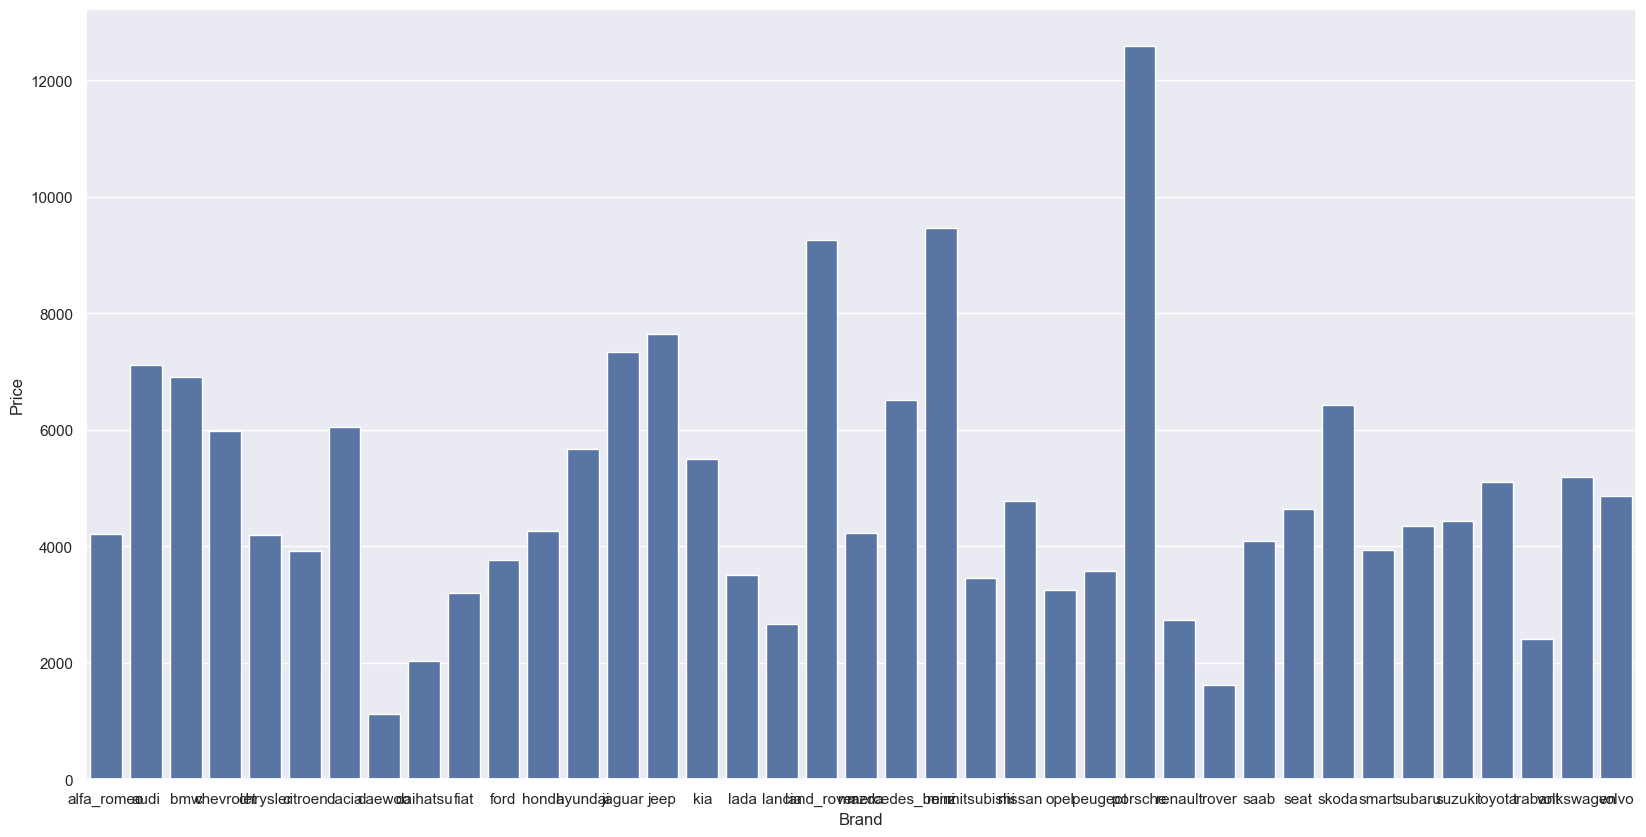

In [13]:
sns.barplot(data=mean_price, x='Brand', y='Price')

<Axes: xlabel='Brand', ylabel='Price'>

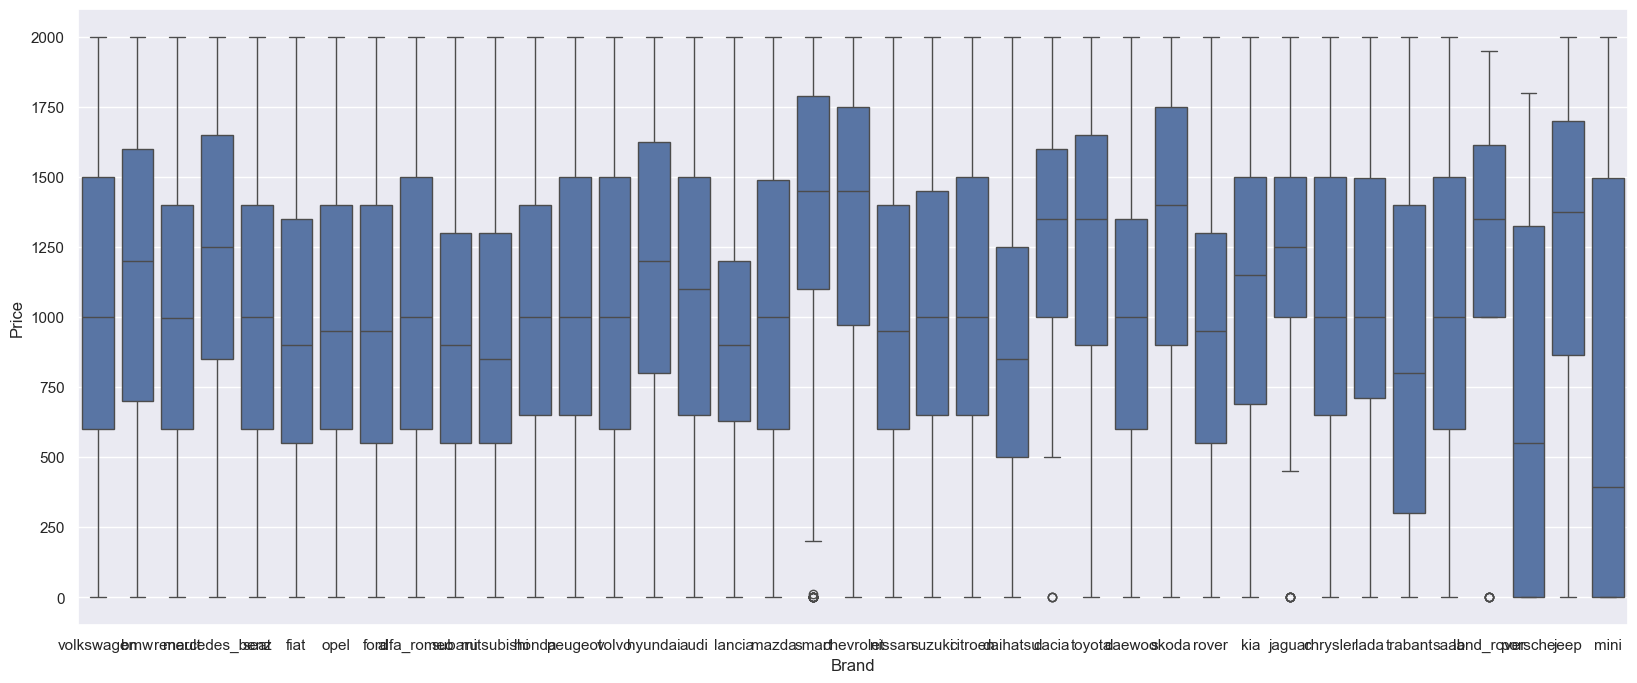

In [14]:
b = dataset[dataset.Price <2000]
plt.figure(figsize=(20,8))
sns.boxplot(y="Price",x="Brand",data =b)

Визуализация данных показала, что средняя цена автомобилей варьируется в зависимости от марки, а также выявила зависимость цены от пробега

In [15]:
dataset["DateCrawled"] = pd.to_datetime(dataset["DateCrawled"]).dt.strftime('%d-%m-%Y')
dataset["DateCreated"] = pd.to_datetime(dataset["DateCreated"]).dt.strftime('%d-%m-%Y')
dataset["LastSeen"] = pd.to_datetime(dataset["LastSeen"]).dt.strftime('%d-%m-%Y')
dataset.head()

C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3283386948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DateCrawled"] = pd.to_datetime(dataset["DateCrawled"]).dt.strftime('%d-%m-%Y')
C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3283386948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["DateCreated"] = pd.to_datetime(dataset["DateCreated"]).dt.strftime('%d-%m-%Y')
C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3283386948.py:3: SettingWithCopyWarning: 
A value is tryi

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
3,17-03-2016,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17-03-2016,0,91074,17-03-2016
4,31-03-2016,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31-03-2016,0,60437,06-04-2016
5,04-04-2016,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04-04-2016,0,33775,06-04-2016
6,01-04-2016,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01-04-2016,0,67112,05-04-2016
7,21-03-2016,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21-03-2016,0,19348,25-03-2016


In [16]:
dataset.drop(columns=["DateCrawled", "DateCreated", "LastSeen"], inplace=True)
dataset.head()

C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3038743394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=["DateCrawled", "DateCreated", "LastSeen"], inplace=True)


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures,PostalCode
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,0,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,0,60437
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,0,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,0,67112
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,0,19348


In [17]:
le = LabelEncoder()
dataset['VehicleType']=le.fit_transform(dataset['VehicleType'])
dataset['Gearbox']=le.fit_transform(dataset['Gearbox'])
dataset['FuelType']=le.fit_transform(dataset['FuelType'])
dataset['Brand']=le.fit_transform(dataset['Brand'])
dataset['Model']=le.fit_transform(dataset['Model'])
dataset['NotRepaired']=le.fit_transform(dataset['NotRepaired'])
dataset.head()

C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3149804182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['VehicleType']=le.fit_transform(dataset['VehicleType'])
C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3149804182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Gearbox']=le.fit_transform(dataset['Gearbox'])
C:\Users\Полина\AppData\Local\Temp\ipykernel_18852\3149804182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures,PostalCode
3,1500,5,2001,1,75,116,150000,6,6,37,0,0,91074
4,3600,5,2008,1,69,101,90000,7,2,31,0,0,60437
5,650,4,1995,1,102,11,150000,10,6,2,1,0,33775
6,2200,1,2004,1,109,8,150000,8,6,25,0,0,67112
7,0,4,1980,1,50,166,40000,7,6,37,0,0,19348


In [18]:
X = dataset.drop(["Price"], axis=1)
Y = dataset["Price"]
X.head()

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,NumberOfPictures,PostalCode
3,5,2001,1,75,116,150000,6,6,37,0,0,91074
4,5,2008,1,69,101,90000,7,2,31,0,0,60437
5,4,1995,1,102,11,150000,10,6,2,1,0,33775
6,1,2004,1,109,8,150000,8,6,25,0,0,67112
7,4,1980,1,50,166,40000,7,6,37,0,0,19348


Построение модели

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Линейная регрессия — это базовая модель, которая предполагает линейную зависимость между целевой переменной (Price) и признаками.

Плюсы: Простота интерпретации, быстрое обучение.
Минусы: Неэффективна, если данные имеют сложные нелинейные зависимости.

In [21]:
Y_pred = model.predict(X_test)

mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11226160.22314567
R^2 0.5005562333972491
RMSE 3350.5462574251483


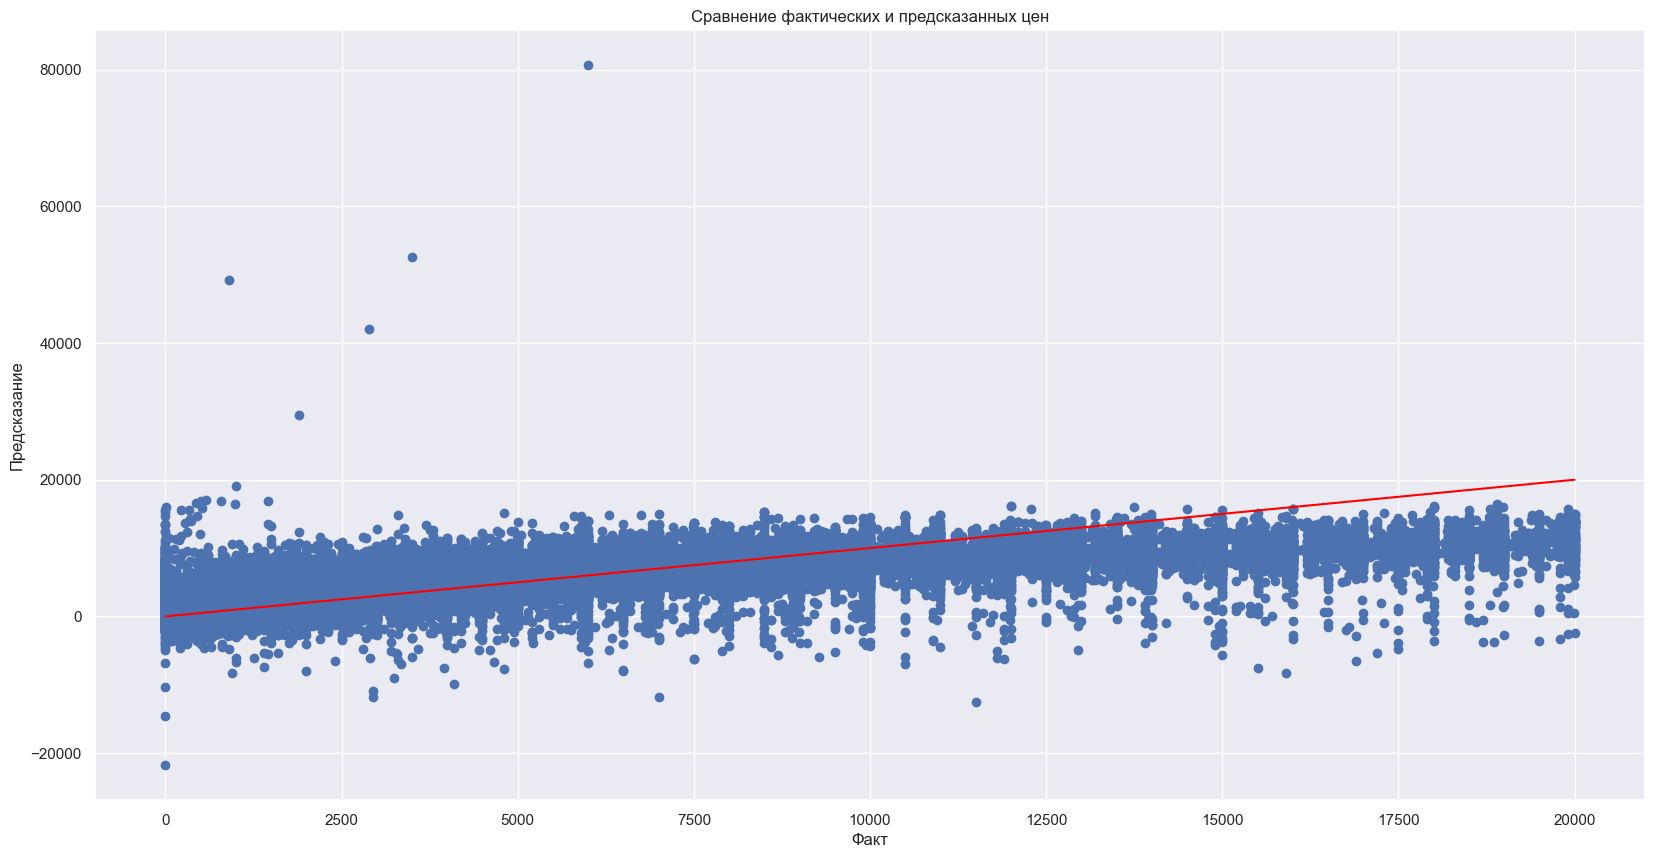

In [22]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Факт')
plt.ylabel('Предсказание')
plt.title('Сравнение фактических и предсказанных цен')
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.show()

In [23]:
model = Ridge(alpha=1)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11226160.22314567
R^2 0.5005562333972491
RMSE 3350.5462574251483


In [24]:
model.coef_

array([-2.18802516e+02,  2.75419089e+02, -2.12047909e+03,  4.16608134e+00,
        8.48839232e-01, -3.77471534e-02,  7.91158398e+00, -4.69218302e+02,
       -3.08135484e+01, -2.00463588e+03,  0.00000000e+00,  8.28893727e-03])

In [ ]:
coefficients = model.coef_
normalized_coefficients = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Вычисление feature_score
feature_scores = normalized_coefficients

top_features_indices = np.argsort(feature_scores)[::-1]  # Сортировка в порядке убывания
top_features_values = feature_scores[top_features_indices]

top_features_dict = {f"Feature {i+1}": v for i, v in zip(top_features_indices, top_features_values)}

print("Feature Scores:", feature_scores)
print("Top Features:", top_features_dict)

Feature Scores: [4.26321083e-02 5.36634435e-02 4.13160213e-01 8.11731210e-04
 1.65390265e-04 7.35476338e-06 1.54151566e-03 9.14238365e-02
 6.00379994e-03 3.90588992e-01 0.00000000e+00 1.61504026e-06]
Top Features: {'Feature 3': 0.4131602129285496, 'Feature 10': 0.3905889919175986, 'Feature 8': 0.0914238365224429, 'Feature 2': 0.0536634434820007, 'Feature 1': 0.0426321082718909, 'Feature 9': 0.006003799937434306, 'Feature 7': 0.0015415156616439807, 'Feature 4': 0.0008117312100150728, 'Feature 5': 0.00016539026479077393, 'Feature 6': 7.354763376946445e-06, 'Feature 12': 1.6150402561794013e-06, 'Feature 11': 0.0}


Ridge — это линейная регрессия с L2-регуляризацией. Она добавляет штраф за квадраты коэффициентов, что уменьшает их значения, но не обнуляет их полностью.

Плюсы: Уменьшение переобучения
Минусы: Не исключает признаки, что может быть недостатком, если в данных много незначимых признаков

In [26]:
model = Lasso(alpha=0.3)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11226160.22314567
R^2 0.5005562333972491
RMSE 3350.5462574251483


In [30]:
model.coef_

array([-2.18736158e+02,  2.75436128e+02, -2.11871097e+03,  4.16705247e+00,
        8.48779853e-01, -3.77479246e-02,  7.90346516e+00, -4.69186817e+02,
       -3.08157462e+01, -2.00176025e+03,  0.00000000e+00,  8.28796231e-03])

In [ ]:
feature_names = [f"Feature {i+1}" for i in range(len(feature_scores))]
top_features_dict = {name: score for name, score in zip(feature_names, feature_scores) if score > 0}

print("Feature Scores:", feature_scores)
print("\nTop Features:")
for name, score in top_features_dict.items():
    print(f"{name}: {score}")

# feature_score = {}

# for fname, score in zip(X.columns, model.coef_):
#     feature_score[fname]= round(score/10000000,2)
    
    
# top_features = {k:v for k,v in feature_score.items() if v>0}
# top_features

NameError: name 'model' is not defined

Lasso — это линейная регрессия с L1-регуляризацией. Она добавляет штраф за абсолютные значения коэффициентов, что может привести к обнулению некоторых коэффициентов

Плюсы: Отбор признаков, уменьшение влияния незначимых признаков
Минусы: Может быть неэффективна, если все признаки важны

In [43]:
model = SGDRegressor(l1_ratio=0.5, loss = 'squared_epsilon_insensitive',max_iter=2000,learning_rate='adaptive')
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
mse=mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('MSE',mse)
print('R^2',r2)
print('RMSE',math.sqrt(mse))

MSE 11226160.22314567
R^2 0.5005562333972491
RMSE 3350.5462574251483


SGDRegressor — это модель, которая использует стохастический градиентный спуск для минимизации функции потерь.

Плюсы: Эффективена для больших датасето
Минусы: Может быть менее стабильной

In [44]:
model.coef_

array([ 7.15220920e+12,  6.07426077e+11,  1.50992614e+12, -4.83580544e+11,
        1.93391486e+12, -3.76581149e+09, -1.24900927e+13,  3.58213621e+12,
       -5.68660794e+13, -7.78165231e+11,  0.00000000e+00,  1.66685636e+10])

In [45]:
feature_score = {}

for fname, score in zip(X.columns, model.coef_):
    feature_score[fname]= round(score/10000000,2)
    
    
top_features = {k:v for k,v in feature_score.items() if v>0}
top_features

{'VehicleType': 715220.92,
 'RegistrationYear': 60742.61,
 'Gearbox': 150992.61,
 'Model': 193391.49,
 'FuelType': 358213.62,
 'PostalCode': 1666.86}

В данном случае Ridge показал лучшие результаты, что может указывать на наличие мультиколлинеарности в данных. Если бы в данных было много незначимых признаков, Lasso мог бы быть более полезным. SGDRegressor может быть полезен для больших датасетов, но требует дополнительной настройки.